## Getting Started

In [4]:
import re

In [5]:
#Q1. Write a regex to extract all the numbers with orange color background from the below text in italics.
'''{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11}, {"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}], 
"errors":[{"code":3, "message":" [PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'''


'{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11}, {"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}], \n"errors":[{"code":3, "message":" [PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'

In [6]:
a='''{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}], 
"errors":[{"code":3,"message":" [PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'''

In [7]:
[i for i in re.findall(":(\d*)",a) if i]

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '648',
 '649',
 '650',
 '651',
 '652',
 '653',
 '3']

In [1]:
#importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the datasets

In [5]:
df_tr = pd.read_csv('train_data_evaluation_part_2.csv')
df_ts = pd.read_csv('test_data_evaluation_part2.csv')
df_tr.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_tr.drop(['Unnamed: 0','ID'],axis=1,inplace=True)
df_tr.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,PRT,NaN,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_ts.drop(['Unnamed: 0','ID'],axis=1,inplace=True)
df_ts.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,SGP,47.0,11,0,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SGP,16.0,11,130,483.48,155.1,0,0,1,15,...,0,0,0,0,0,0,0,0,0,0
2,SGP,15.0,11,0,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SGP,12.0,11,0,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PRT,NaN,11,0,0.00,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
df_tr.shape

(82580, 28)

In [12]:
df_ts.shape

(1000, 28)

In [9]:
df_tr.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,4.667958,2.369411,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,4.562507,2.281758,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,7.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
#Checking for Null values

In [10]:
(df_tr.isnull().sum()/len(df_tr))*100

Nationality             0.000000
Age                     4.536207
DaysSinceCreation       0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoom             0.000000
dtype: float64

In [91]:
#Fillna with the median value of the variable

In [14]:
df_tr['Age'] = df_tr['Age'].fillna(df_tr['Age'].median())
df_ts['Age'] = df_ts['Age'].fillna(df_ts['Age'].median())

In [19]:
df_tr['BookingsCheckedIn'].unique()

array([ 3,  1,  0,  9,  2, 11, 12,  7,  8,  5,  6,  4, 66, 15, 29, 25, 10,
       17, 13, 26, 23, 57, 40, 18, 14, 24, 19, 20, 34], dtype=int64)

In [18]:
df_tr['Age'].unique()

array([ 51.,  46.,  31.,  60.,  54.,  49.,  32.,  42.,  25.,  27.,  58.,
        56.,  57.,  68.,  72.,  71.,  24.,  26.,  50.,  52.,  36.,  64.,
        65.,  47.,  67.,  39.,  41.,  43.,   3.,  63.,  30.,  28.,  18.,
        53.,  48.,  17.,  38.,  40.,  59.,  13.,  61.,  69.,  55.,  70.,
        34.,  66.,  82.,  35.,   6.,  62.,  45.,  37.,  29.,  10.,   8.,
         7.,   4.,  44.,   9.,  33.,   5.,  20.,  14.,  74.,  11.,  73.,
         1.,  22.,  19.,  78.,  77.,  21.,  76.,  75.,  15.,  83.,  12.,
        23.,  80.,  79.,  16.,  -7.,  81., 114.,  84.,  -9.,  85.,  87.,
       -11.,  89.,  91.,  88.,  86., -10.,  -6.,  -1., 110.,   2.,  92.,
       113.,  90.,   0., 122.,  96., 109.])

In [ ]:
#Since there are some neagtive values in the column AGE, Discarding the negative values.

In [20]:
df_tr = df_tr[(df_tr['Age']>0) & (df_tr['Age']<100) & (df_tr['AverageLeadTime'] >= 0)]
df_tr.shape

(82505, 28)

In [21]:
df_ts = df_ts[(df_ts['Age']>0) & (df_ts['Age']<100) & (df_ts['AverageLeadTime'] >= 0)]
df_ts.shape

(998, 28)

In [22]:
df_tr["BookingsCheckedIn"] = np.where(df_tr["BookingsCheckedIn"] > 0, 1, 0)
df_ts["BookingsCheckedIn"] = np.where(df_ts["BookingsCheckedIn"] > 0, 1, 0)

In [93]:
#Replacing the values greater then 0 with 1 and values less than 0 with 0

In [23]:
df_tr['BookingsCheckedIn'].value_counts()

1    63155
0    19350
Name: BookingsCheckedIn, dtype: int64

In [24]:
df_ts['BookingsCheckedIn'].value_counts()

0    519
1    479
Name: BookingsCheckedIn, dtype: int64

In [25]:
cols = df_tr.columns.to_list()
cols

['Nationality',
 'Age',
 'DaysSinceCreation',
 'AverageLeadTime',
 'LodgingRevenue',
 'OtherRevenue',
 'BookingsCanceled',
 'BookingsNoShowed',
 'BookingsCheckedIn',
 'PersonsNights',
 'RoomNights',
 'DaysSinceLastStay',
 'DaysSinceFirstStay',
 'DistributionChannel',
 'MarketSegment',
 'SRHighFloor',
 'SRLowFloor',
 'SRAccessibleRoom',
 'SRMediumFloor',
 'SRBathtub',
 'SRShower',
 'SRCrib',
 'SRKingSizeBed',
 'SRTwinBed',
 'SRNearElevator',
 'SRAwayFromElevator',
 'SRNoAlcoholInMiniBar',
 'SRQuietRoom']

In [27]:
print(df_tr.shape)
print(df_ts.shape)

(82505, 28)
(998, 28)


_______________________________________________________________________________________________________________________________

## EDA

In [28]:
df_tr['Age'] = df_tr['Age'].astype('int32')
df_ts['Age'] = df_ts['Age'].astype('int32')

## Feature Engineering

In [94]:
#Creating a new feature with Age by making buckets

In [29]:
l1=[]
for i in df_ts['Age']:
    if ((i>0)&(i<20)):
        l1.append('0-20')
    elif ((i>20)&(i<40)):
        l1.append('20-40')
    elif ((i>40)&(i<60)):
        l1.append('40-60')
    elif ((i>60)&(i<80)):
        l1.append('60-80')
    else:
        l1.append('Age > 80')
df_ts['Age_bucket'] = l1

In [30]:
l1=[]
for i in df_tr['Age']:
    if ((i>0)&(i<20)):
        l1.append('0-20')
    elif ((i>20)&(i<40)):
        l1.append('20-40')
    elif ((i>40)&(i<60)):
        l1.append('40-60')
    elif ((i>60)&(i<80)):
        l1.append('60-80')
    else:
        l1.append('Age > 80')
df_tr['Age_bucket'] = l1

In [31]:
df_tr.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Age_bucket
0,PRT,51,150,45,371.0,105.3,1,0,1,8,...,0,0,0,0,0,0,0,0,0,40-60
1,PRT,46,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,40-60
2,DEU,31,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20-40
3,FRA,60,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,Age > 80
4,FRA,51,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40-60


In [32]:
df_ts.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Age_bucket
0,SGP,47,11,0,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40-60
1,SGP,16,11,130,483.48,155.1,0,0,1,15,...,0,0,0,0,0,0,0,0,0,0-20
2,SGP,15,11,0,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0-20
3,SGP,12,11,0,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0-20
4,PRT,42,11,0,0.00,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,40-60


In [33]:
cols1 = df_tr.columns.to_list()
cols1

['Nationality',
 'Age',
 'DaysSinceCreation',
 'AverageLeadTime',
 'LodgingRevenue',
 'OtherRevenue',
 'BookingsCanceled',
 'BookingsNoShowed',
 'BookingsCheckedIn',
 'PersonsNights',
 'RoomNights',
 'DaysSinceLastStay',
 'DaysSinceFirstStay',
 'DistributionChannel',
 'MarketSegment',
 'SRHighFloor',
 'SRLowFloor',
 'SRAccessibleRoom',
 'SRMediumFloor',
 'SRBathtub',
 'SRShower',
 'SRCrib',
 'SRKingSizeBed',
 'SRTwinBed',
 'SRNearElevator',
 'SRAwayFromElevator',
 'SRNoAlcoholInMiniBar',
 'SRQuietRoom',
 'Age_bucket']

In [34]:
num_cols = df_tr.select_dtypes(np.number).columns.tolist()
cat_cols = [e for e in cols1 if e not in (num_cols)]

### Checking the distribution of Categorical Variables

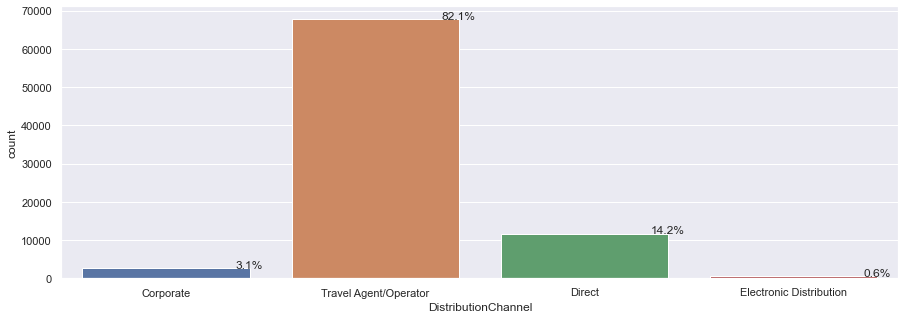

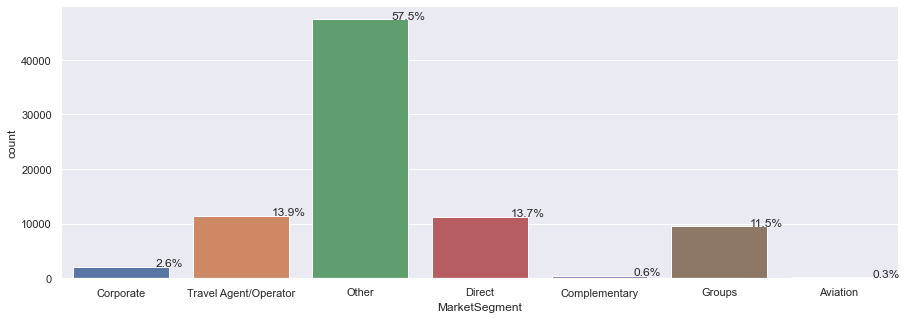

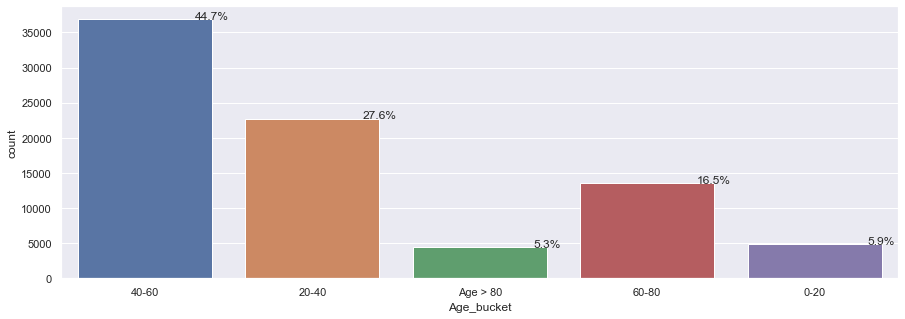

In [36]:
for i in cat_cols:
    sns.set(style="darkgrid")
    plt.figure(figsize=(15,5))
    total = float(len(df_tr))
    ax = sns.countplot(x=i, data=df_tr)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage,(x,y),ha='center')
    plt.show()

### Comparing the Distribution of Categorical variables with Target

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Travel Agent/Operator')])

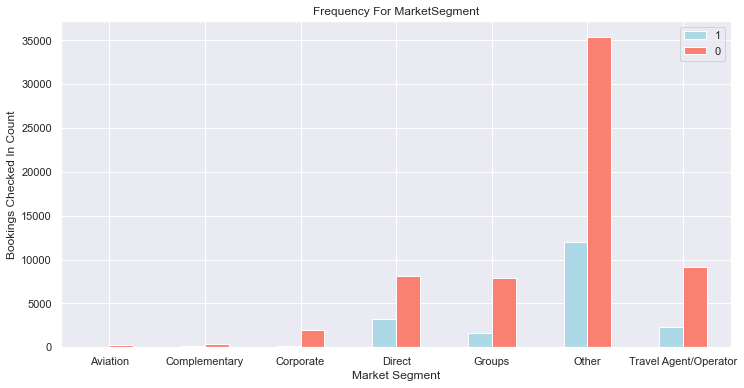

In [37]:
ax= pd.crosstab(df_tr.MarketSegment,df_tr.BookingsCheckedIn).plot(kind="bar",
                                          color=["lightblue","salmon"],
                                          rot=0,figsize=(12,6))

# for c in ax.containers:
    
    # set the bar label
#     ax.containers(c, rot=0,label_type='center')
x= df_tr['BookingsCheckedIn'].unique()
plt.title("Frequency For MarketSegment")
plt.xlabel("Market Segment")
plt.ylabel("Bookings Checked In Count")
plt.legend(x)
plt.xticks(rotation = 0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'Electronic Distribution'),
  Text(3, 0, 'Travel Agent/Operator')])

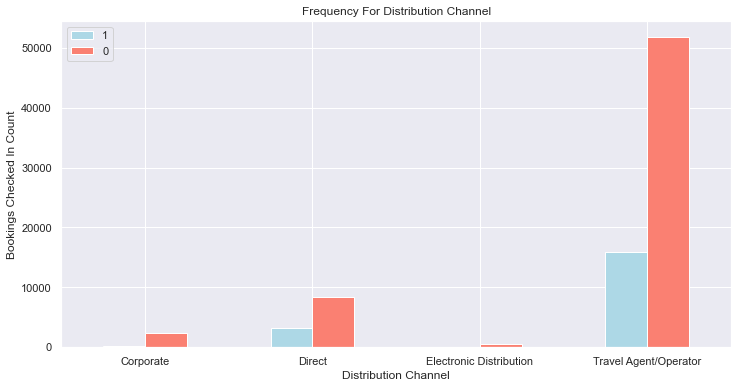

In [38]:
ax= pd.crosstab(df_tr.DistributionChannel,df_tr.BookingsCheckedIn).plot(kind="bar",
                                          color=["lightblue","salmon"],
                                          rot=0,figsize=(12,6))

# for c in ax.containers:
    
    # set the bar label
#     ax.containers(c, rot=0,label_type='center')
x= df_tr['BookingsCheckedIn'].unique()
plt.title("Frequency For Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Bookings Checked In Count")
plt.legend(x)
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-20'),
  Text(1, 0, '20-40'),
  Text(2, 0, '40-60'),
  Text(3, 0, '60-80'),
  Text(4, 0, 'Age > 80')])

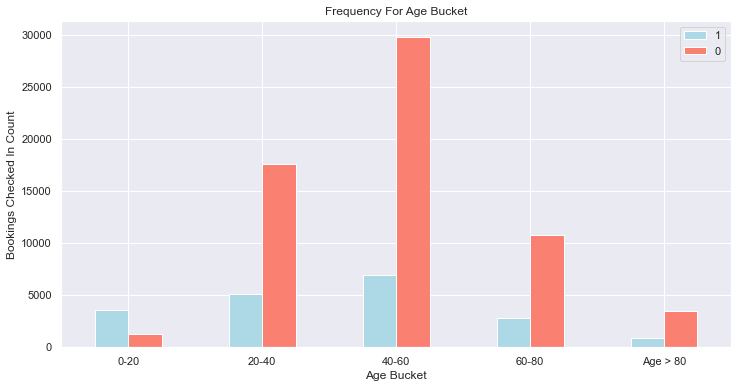

In [39]:
ax= pd.crosstab(df_tr.Age_bucket,df_tr.BookingsCheckedIn).plot(kind="bar",
                                          color=["lightblue","salmon"],
                                          rot=0,figsize=(12,6))

# for c in ax.containers:
    
    # set the bar label
#     ax.containers(c, rot=0,label_type='center')
x= df_tr['BookingsCheckedIn'].unique()
plt.title("Frequency For Age Bucket")
plt.xlabel("Age Bucket")
plt.ylabel("Bookings Checked In Count")
plt.legend(x)
plt.xticks(rotation = 0)

### Distribution of Numerical Variables

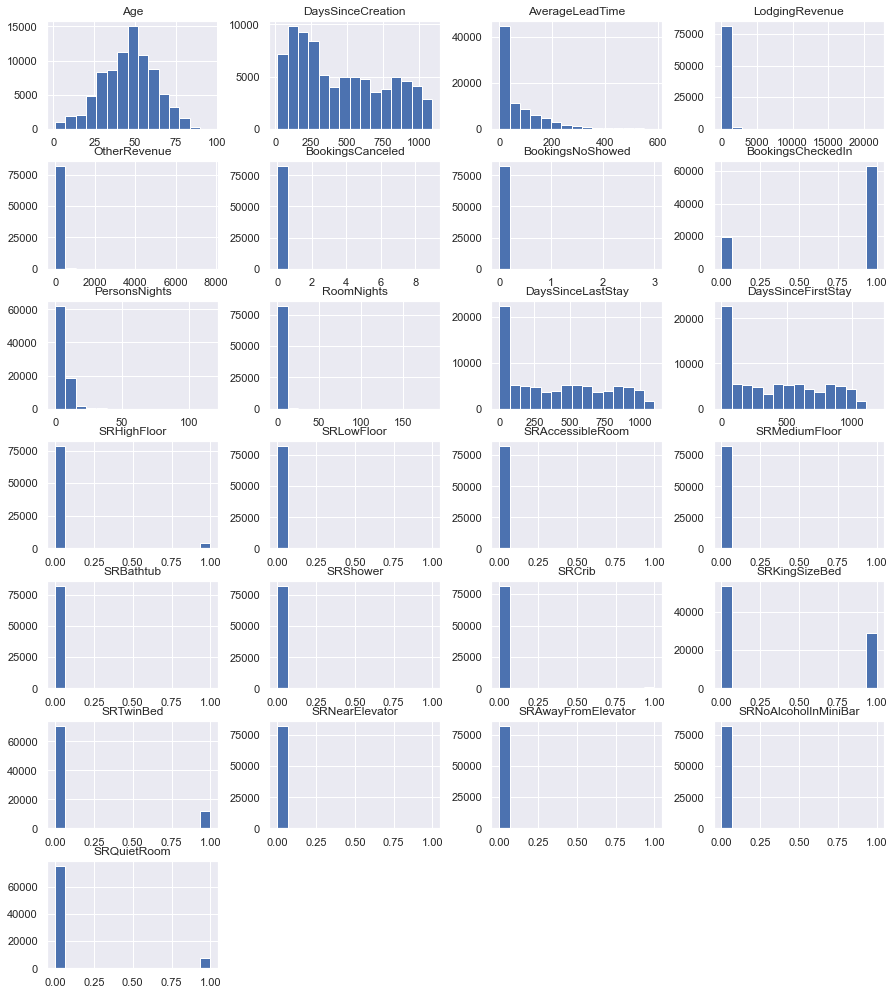

In [49]:
df_tr[num_cols].hist(bins=15, figsize=(15, 20), layout=(8, 4));

In [50]:
import warnings
warnings.filterwarnings(action='ignore')

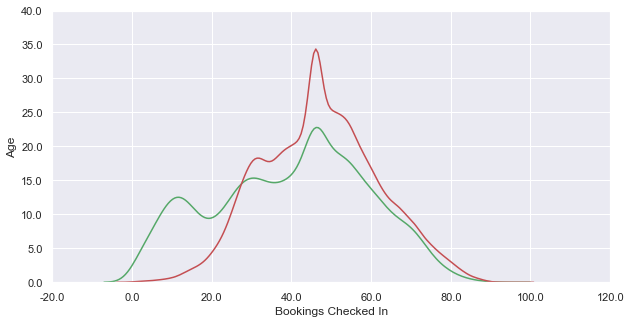

In [52]:
plt.figure(figsize=(10,5))
fig = sns.distplot(df_tr.loc[df_tr['BookingsCheckedIn'] == 0, 'Age'], hist=False, color='g')
fig = sns.distplot(df_tr.loc[df_tr['BookingsCheckedIn'] == 1, 'Age'], hist=False, color='r')
plt.xticks(fig.get_xticks(), fig.get_xticks())
plt.yticks(fig.get_yticks(), fig.get_yticks()*1000)
plt.ylabel('Age')
plt.xlabel('Bookings Checked In')
plt.show()

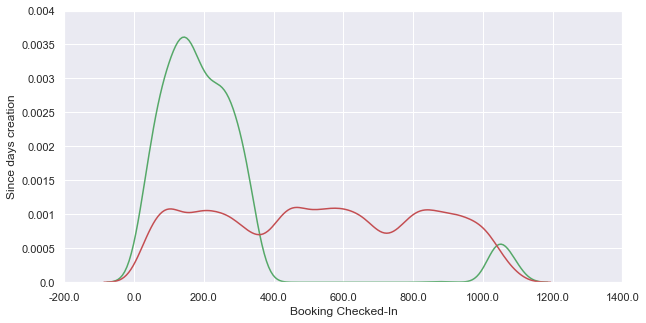

In [53]:
plt.figure(figsize=(10,5))
fig = sns.distplot(df_tr.loc[df_tr['BookingsCheckedIn'] == 0, 'DaysSinceCreation'], hist=False, color='g')
fig = sns.distplot(df_tr.loc[df_tr['BookingsCheckedIn'] == 1, 'DaysSinceCreation'], hist=False, color='r')
plt.xticks(fig.get_xticks(), fig.get_xticks())
plt.yticks(fig.get_yticks(), fig.get_yticks())
plt.ylabel('Since days creation')
plt.xlabel('Booking Checked-In')
plt.show()

In [55]:
font_size = 20
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

colors = ['#DD403A', '#00A5E0']
colors_cat = ['#E8907E', '#D5CABD', '#7A6F86', '#C34A36', '#B0A8B9', '#845EC2', '#8f9aaa', '#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']
colors_comp = ['steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey']

def plot_categorical(feature, d):
    
    '''For a categorical feature, plot a seaborn.countplot for the total counts of each category next to a barplot for the fraud rate.'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

    ax = sns.countplot(x=feature,
                  hue='BookingsCheckedIn',
                  data=d,
                  palette=colors[::-1],
                  ax=ax1)
    for bar in ax.patches:
        ax.annotate('{:.1f}'.format(bar.get_height()), (bar.get_x() + bar.get_width() / 2.9, 
                      bar.get_height() + 1000), ha='center', va='center', backgroundcolor="w",
                    size=15, xytext=(0, 8),
                    textcoords='offset points', rotation=90)
#     nw = ["Transaction_Type__c", "Market_Bucketed", "NLS", "NTT","Type","Market__c"]
    if feature in cat_cols:
        ax1.set_xticklabels(list(d[feature].unique()),rotation=90)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['0', '1'])

    barss = sns.barplot(x=feature,
                y='BookingsCheckedIn',
                data=d,
                palette=colors_cat,
                ax=ax2)
    
    for bar in barss.patches:
        barss.annotate(format(bar.get_height()*100, '.2f')+"%",
                    (bar.get_x() + bar.get_width() / 2.9, 
                      bar.get_height()), ha='center', va='center', backgroundcolor="w",
                    size=15, xytext=(0, 8),
                    textcoords='offset points', rotation=90)

    ax2.set_ylabel('Rate')
    if feature in cat_cols:
        ax2.set_xticklabels(list(d[feature].unique()),rotation=90)

    plt.tight_layout();


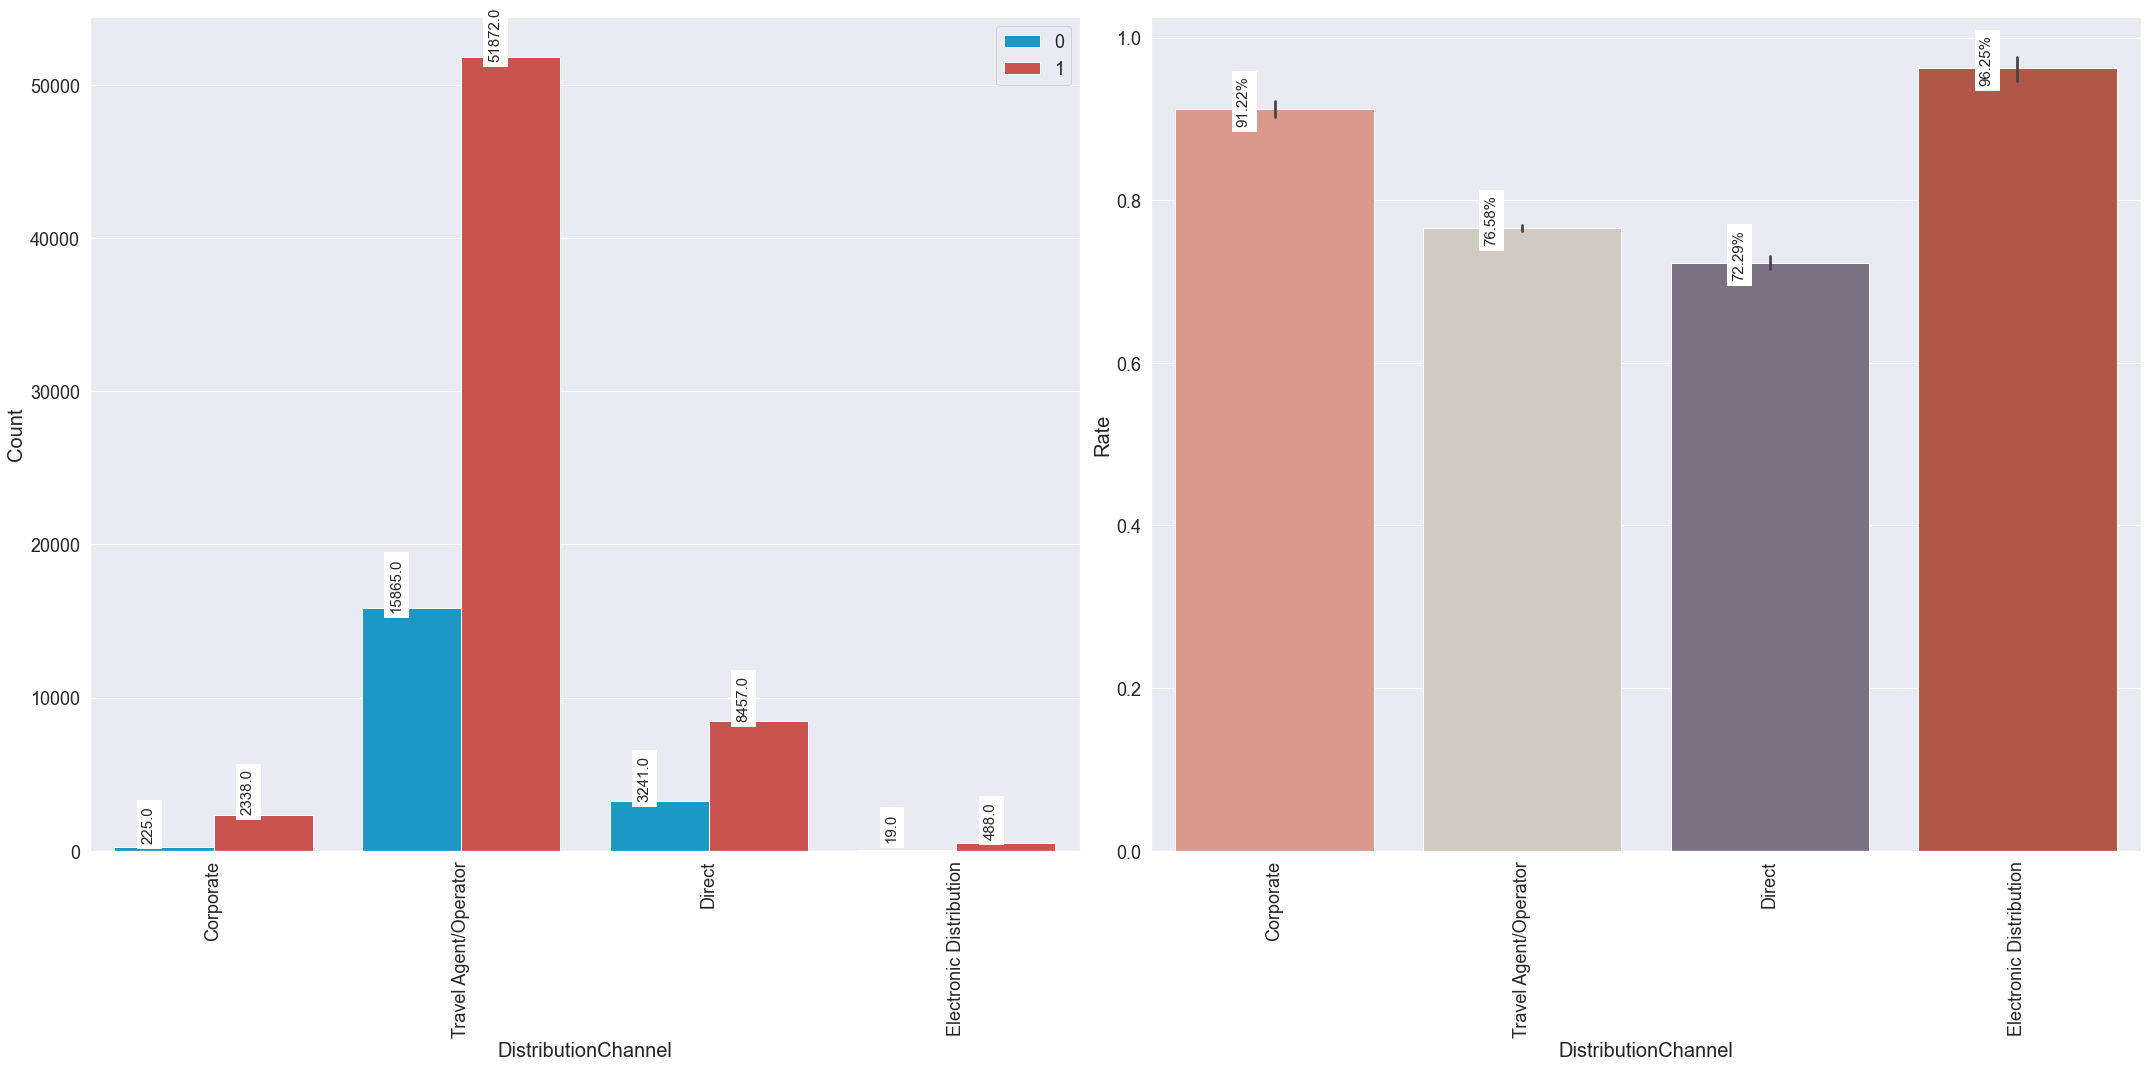

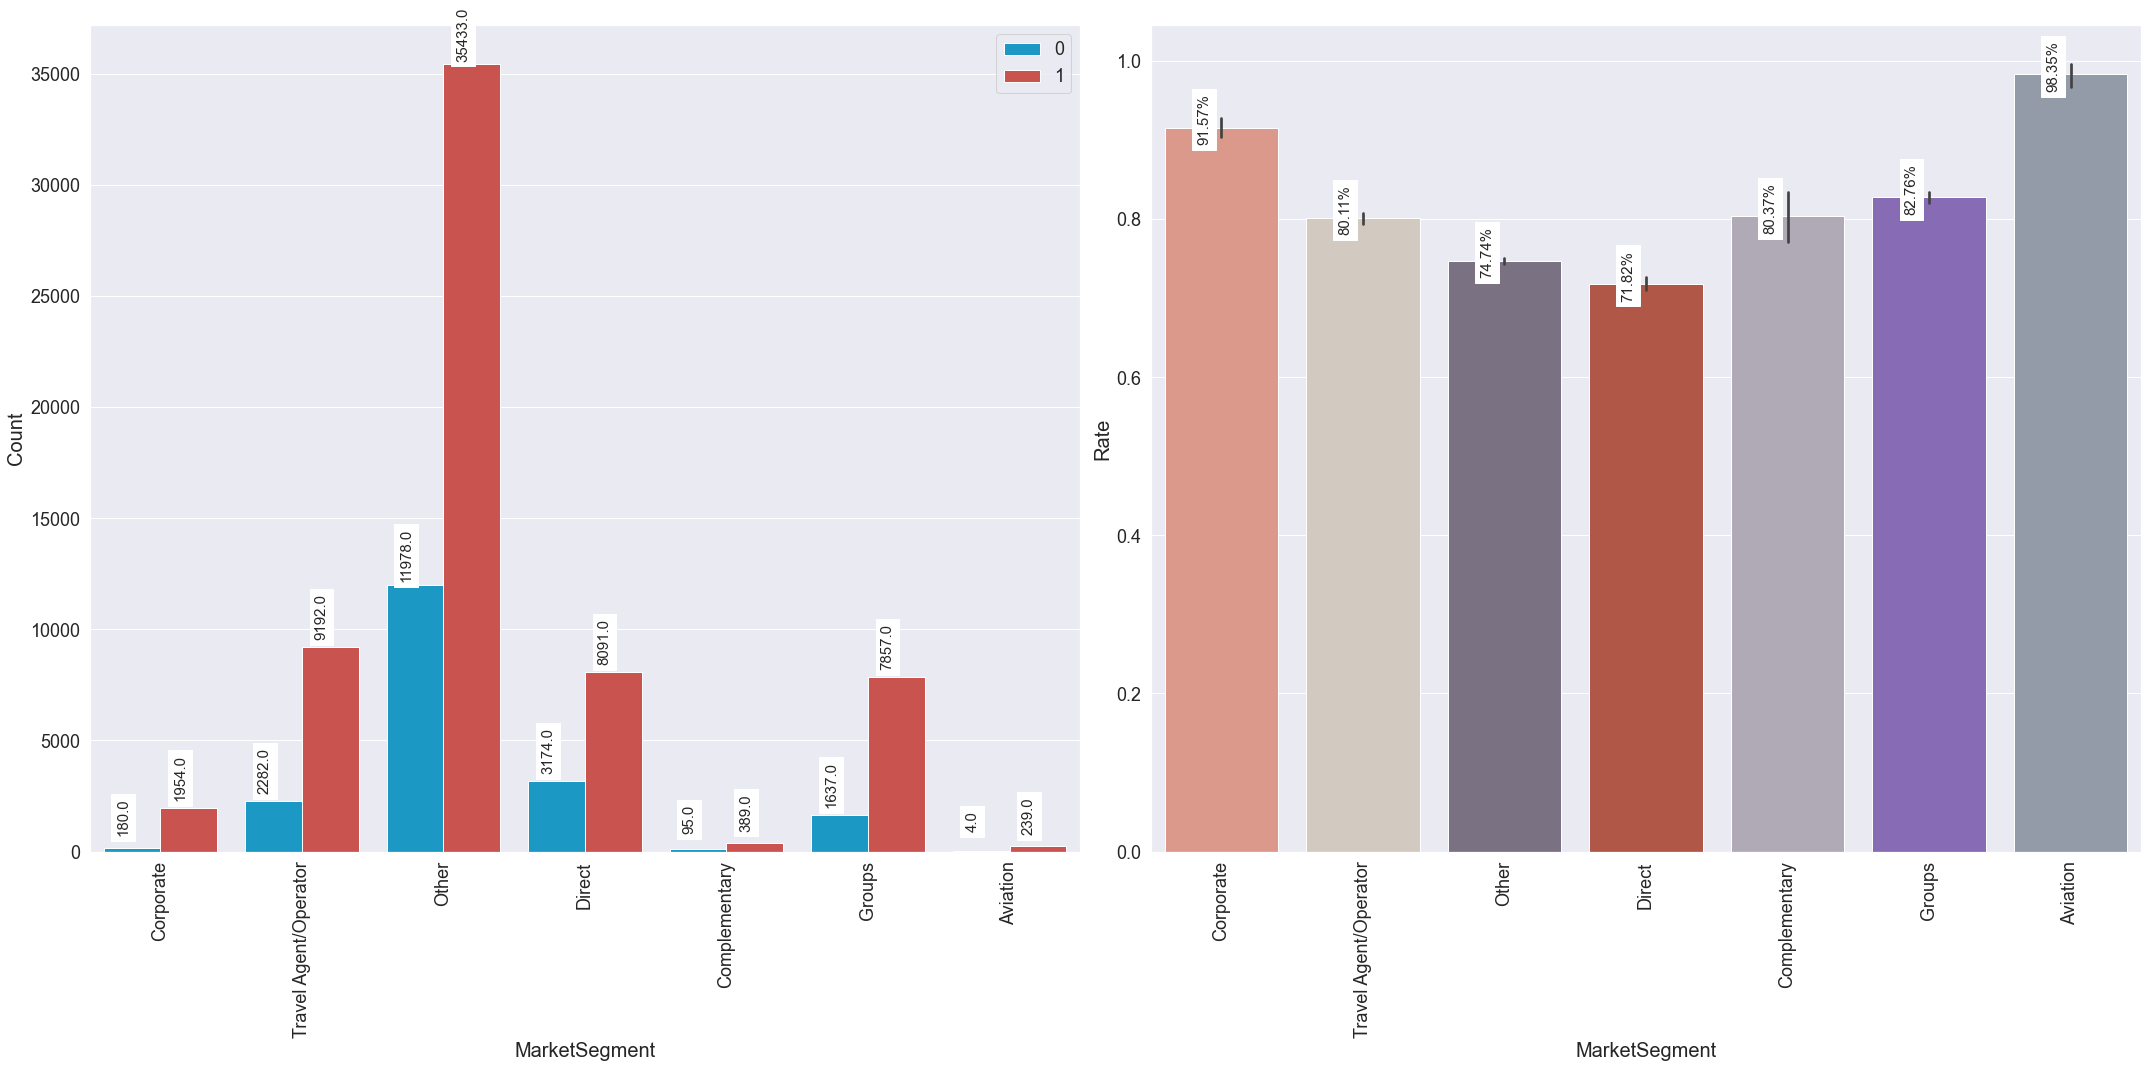

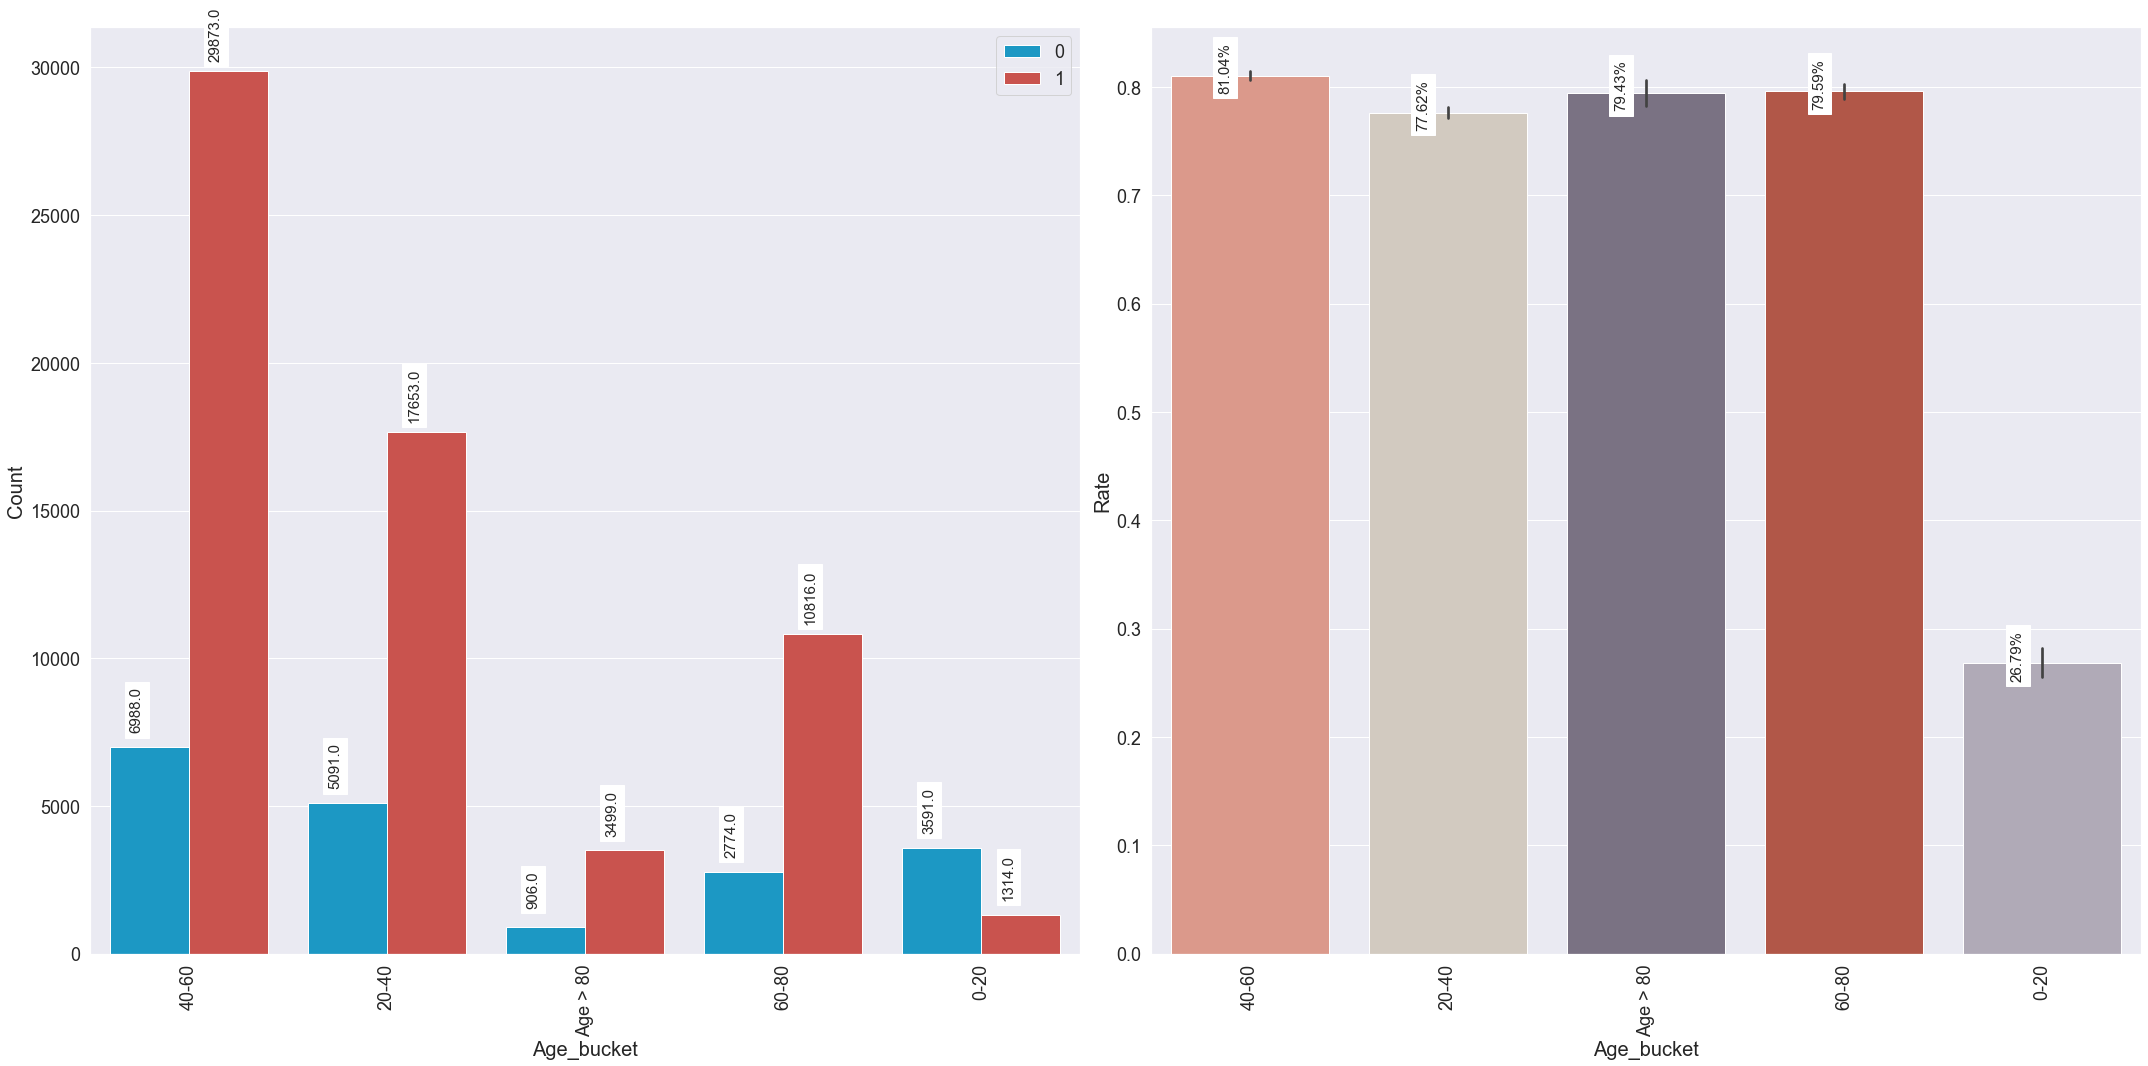

In [56]:
for i in cat_cols:
    plot_categorical(i,df_tr)

_______________________________________________________________________________________________________________________________

## Feature Selection

In [57]:
def Feat_correlation(data,feature_list,target_variable):
    corr_data = data[feature_list]
    corr_data[target_variable] = data[target_variable]
    corr = corr_data.corr()
    corr_arr = np.asarray(corr)
    columns = list(corr.columns)
    frame = []
    result_frame = pd.DataFrame([])
    for i in range(len(corr_arr)):
        for j in range(i+1,len(corr_arr)):
            if abs(corr_arr[i,j]) >= 0.5:
                corr_val = {"corr_value":corr_arr[i,j],"feature1":columns[i],"corr_target_feature1":corr_arr[i][-1],"feature2":columns[j],"corr_target_feature2":corr_arr[j][-1]}
                if abs(corr_arr[i,-1]) >= abs(corr_arr[j,-1]) and (columns[j] in list(corr_data.columns)):
                    corr_val.update({'Removed feature':columns[j]})
                    corr_data = corr_data.drop(columns[j],axis=1)
                elif columns[i] in list(corr_data.columns):
                    corr_data = corr_data.drop(columns[i],axis=1)
                    corr_val.update({'Removed feature':columns[i]})
                frame.append(corr_val)
    if len(frame)!=0:
        result_frame = result_frame.append(frame,True)
        columns_titles = ["corr_value","feature1","corr_target_feature1","feature2","corr_target_feature2","Removed feature"]
        result_frame = result_frame.reindex(columns=columns_titles)
        selected_feature_based_on_corr = list(corr_data.columns)
        return selected_feature_based_on_corr
        #return result_frame,selected_feature_based_on_corr
    
    else:
        return list(corr_data.columns)

In [58]:
Feat_correlation(df_tr,cols,'BookingsCheckedIn')

['Nationality',
 'Age',
 'DaysSinceCreation',
 'AverageLeadTime',
 'LodgingRevenue',
 'BookingsCanceled',
 'BookingsNoShowed',
 'DistributionChannel',
 'MarketSegment',
 'SRHighFloor',
 'SRLowFloor',
 'SRAccessibleRoom',
 'SRMediumFloor',
 'SRBathtub',
 'SRShower',
 'SRCrib',
 'SRKingSizeBed',
 'SRTwinBed',
 'SRNearElevator',
 'SRAwayFromElevator',
 'SRNoAlcoholInMiniBar',
 'SRQuietRoom']

In [59]:
df_tr = df_tr[['Nationality','Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','BookingsCanceled',
               'BookingsNoShowed','DistributionChannel','MarketSegment','SRHighFloor','SRLowFloor','SRAccessibleRoom',
               'SRMediumFloor','SRBathtub', 'SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator',
               'SRAwayFromElevator','SRNoAlcoholInMiniBar','SRQuietRoom','Age_bucket','BookingsCheckedIn']]

In [60]:
df_ts = df_ts[['Nationality','Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','BookingsCanceled',
               'BookingsNoShowed','DistributionChannel','MarketSegment','SRHighFloor','SRLowFloor','SRAccessibleRoom',
               'SRMediumFloor','SRBathtub', 'SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator',
               'SRAwayFromElevator','SRNoAlcoholInMiniBar','SRQuietRoom','Age_bucket','BookingsCheckedIn']]

In [61]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

result_frame = pd.DataFrame([])

for i in cat_cols:
    X = df_tr[i].astype(str)
    Y = df_tr['BookingsCheckedIn'].astype(str)
    dfObserved = pd.crosstab(Y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    result = " "
    if p<0.05:
        result="Important Predictor"
    else:
        result="Discard"
    frame ={"Variable":i,"result":result,"p_value":p,"test_statistics":chi2}
    result_frame = result_frame.append(frame,ignore_index=True)

In [62]:
result_frame

,Variable,p_value,result,test_statistics
0,DistributionChannel,1.265958e-115,Important Predictor,534.957246
1,MarketSegment,5.956600e-180,Important Predictor,848.184576
2,Age_bucket,0.000000e+00,Important Predictor,7284.338505


In [63]:
df_tr.drop(['Age_bucket'],axis=1,inplace=True)
df_ts.drop(['Age_bucket'],axis=1,inplace=True)

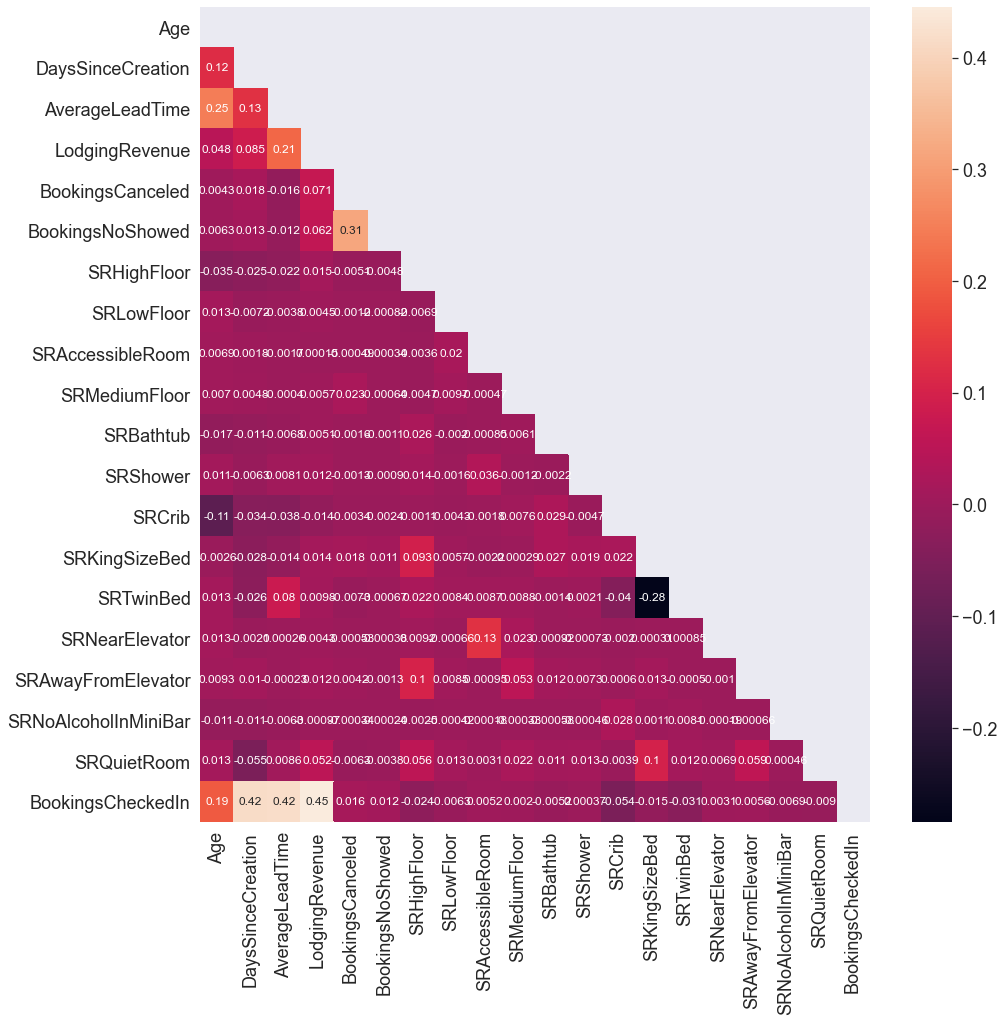

In [64]:
plt.figure(figsize=(15,15))
corr2= df_tr.corr()

matrix = np.triu(corr2)

sns.heatmap(corr2, mask=matrix,annot=True)
plt.show()

### Statistical Test

In [65]:
numerical_df = df_tr.select_dtypes(np.number)

In [66]:
data_0=numerical_df[numerical_df['BookingsCheckedIn']==0]
data_1=numerical_df[numerical_df['BookingsCheckedIn']==1]

In [67]:
cols1 = numerical_df.columns.tolist()
cols1

['Age',
 'DaysSinceCreation',
 'AverageLeadTime',
 'LodgingRevenue',
 'BookingsCanceled',
 'BookingsNoShowed',
 'SRHighFloor',
 'SRLowFloor',
 'SRAccessibleRoom',
 'SRMediumFloor',
 'SRBathtub',
 'SRShower',
 'SRCrib',
 'SRKingSizeBed',
 'SRTwinBed',
 'SRNearElevator',
 'SRAwayFromElevator',
 'SRNoAlcoholInMiniBar',
 'SRQuietRoom',
 'BookingsCheckedIn']

In [68]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

for col in cols1:
    norm=shapiro(numerical_df[col])[1] # normality test
    if norm>0.05:   # normal
        pval = ttest_ind(data_0[col],data_1[col])[1]      
        if pval<0.05:
            print(col,':Ttest:',pval,":Significant")
        else:
             print(col,':Ttest:',pval,":InSignificant")
               
    else:                        # not normal
        pval = mannwhitneyu(data_0[col],data_1[col])[1]
        if pval<0.05:
            print(col,':Manwhitneyutest:',pval,":Significant")
        else:
             print(col,':Manwhitneyutest:',pval,":InSignificant")

Age :Manwhitneyutest: 0.0 :Significant
DaysSinceCreation :Manwhitneyutest: 0.0 :Significant
AverageLeadTime :Manwhitneyutest: 0.0 :Significant
LodgingRevenue :Manwhitneyutest: 0.0 :Significant
BookingsCanceled :Manwhitneyutest: 3.3266612580248135e-09 :Significant
BookingsNoShowed :Manwhitneyutest: 0.00012003959589495847 :Significant
SRHighFloor :Manwhitneyutest: 2.1270158268405507e-12 :Significant
SRLowFloor :Manwhitneyutest: 0.035139988533503225 :Significant
SRAccessibleRoom :Manwhitneyutest: 0.06594406851452825 :InSignificant
SRMediumFloor :Manwhitneyutest: 0.278910688224003 :InSignificant
SRBathtub :Manwhitneyutest: 0.06839380287854754 :InSignificant
SRShower :Manwhitneyutest: 0.45768625591038853 :InSignificant
SRCrib :Manwhitneyutest: 8.247023147611771e-54 :Significant
SRKingSizeBed :Manwhitneyutest: 1.1762712493726951e-05 :Significant
SRTwinBed :Manwhitneyutest: 2.0138520358290204e-19 :Significant
SRNearElevator :Manwhitneyutest: 0.1895273734765764 :InSignificant
SRAwayFromElevato

In [69]:
discard_features = ['SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRNearElevator','SRAwayFromElevator']

In [70]:
df_tr.drop(discard_features,axis=1,inplace=True)
df_tr.shape

(82505, 17)

In [71]:
df_ts.drop(discard_features,axis=1,inplace=True)
df_ts.shape

(998, 17)

In [72]:
df_trn = df_tr.copy()

In [73]:
df_trn.drop(['Nationality','MarketSegment'],axis=1,inplace=True)
df_trn = pd.get_dummies(df_trn,drop_first=True)
df_trn.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,BookingsCanceled,BookingsNoShowed,SRHighFloor,SRLowFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRNoAlcoholInMiniBar,SRQuietRoom,BookingsCheckedIn,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator
0,51,150,45,371.0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,46,1095,61,280.0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,31,1095,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,60,1095,93,240.0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,51,1095,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
df_tst = df_ts.copy()

In [75]:
df_tst.drop(['Nationality','MarketSegment'],axis=1,inplace=True)
df_tst = pd.get_dummies(df_tst,drop_first=True)
df_tst.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,BookingsCanceled,BookingsNoShowed,SRHighFloor,SRLowFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRNoAlcoholInMiniBar,SRQuietRoom,BookingsCheckedIn,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator
0,47,11,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1
1,16,11,130,483.48,0,0,0,0,0,0,0,0,0,1,0,0,1
2,15,11,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1
3,12,11,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1
4,42,11,0,0.00,0,0,1,0,0,1,0,0,0,0,0,0,1


In [76]:
df_trn.shape

(82505, 17)

In [77]:
df_tst.shape

(998, 17)

In [78]:
X = df_trn.drop(['BookingsCheckedIn'],axis=1)
y = df_trn['BookingsCheckedIn']

In [79]:
X.columns

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'SRHighFloor', 'SRLowFloor',
       'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'DistributionChannel_Direct',
       'DistributionChannel_Electronic Distribution',
       'DistributionChannel_Travel Agent/Operator'],
      dtype='object')

_______________________________________________________________________________________________________________________________

## Model

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [81]:
model = Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [82]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [83]:
model.fit(X,y,epochs=25,batch_size=10)

Epoch 1/25
8251/8251 [==============================] - 21s 2ms/step - loss: 0.4084 - accuracy: 0.9831
Epoch 2/25
8251/8251 [==============================] - 19s 2ms/step - loss: 0.0164 - accuracy: 0.9966
Epoch 3/25
8251/8251 [==============================] - 20s 2ms/step - loss: 0.0128 - accuracy: 0.9974
Epoch 4/25
8251/8251 [==============================] - 19s 2ms/step - loss: 0.0102 - accuracy: 0.9978
Epoch 5/25
8251/8251 [==============================] - 19s 2ms/step - loss: 0.0096 - accuracy: 0.9979
Epoch 6/25
8251/8251 [==============================] - 16s 2ms/step - loss: 0.0075 - accuracy: 0.9982
Epoch 7/25
8251/8251 [==============================] - 16s 2ms/step - loss: 0.0072 - accuracy: 0.9984
Epoch 8/25
8251/8251 [==============================] - 16s 2ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 9/25
8251/8251 [==============================] - 18s 2ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 10/25
8251/8251 [==============================] - 17s 2ms/step - l

In [84]:
_,accuracy = model.evaluate(X,y)
print('Accuracy: %.2f'%(accuracy*100))

2579/2579 [==============================] - 6s 2ms/step - loss: 0.0049 - accuracy: 0.9989
Accuracy: 99.89


#### Accuracy of the Test Data

In [85]:
X1 = df_tst.drop(['BookingsCheckedIn'],axis=1)

In [86]:
y1 = df_tst['BookingsCheckedIn']

In [87]:
pred = model.predict(X1)

In [89]:
_,accuracy1 = model.evaluate(X1,y1)
print('Accuracy: %.2f'%(accuracy1*100))

32/32 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9990
Accuracy: 99.90


### Saving the model

In [128]:
import tensorflow as tf

saved_model_path = 'C://Users//ADMIN//Downloads//NL'
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: C://Users//ADMIN//Downloads//NL/assets


_______________________________________________________________________________________________________________________________